### Notebook index

[3 Minimal examples](02-minimal.ipynb)  
[4 Plotting chromosomes](03-plotting.ipynb)   
[5 Multiple OTUs](04-multiple.ipynb)    
[6 Changing units](05-units.ipynb)  
[7 GISH](06-gish.ipynb)  
[8 Groups](07-groups.ipynb)  
[9 Circular Plots](08-circular.ipynb)  
[10 Plotting alongside phylogeny](09-phylogeny.ipynb)  
[11 Citrus](10-citrushelp.ipynb)  
[12 Human Karyotype](11-human.ipynb)  

# Minimal examples

In [ ]:
# General jupyter instructions

In [ ]:
# press Ctrl + Enter to RUN active cell

# SHOW keyboard shortcuts Ctrl + M then H (only jupyter notebooks and colab)

# Ctrl + D (or X) DELETE a line of code

# press Ctrl + M to escape from cell (opposite to ENTER)

# then !
# B to ADD cell below or A above
# M to turn cell into MARKDOWN
# O to toggle OUTPUT
# D D to DELETE cell

# If in jupyter-lab:
# collapse cell clicking in the blue left bar
# use the settings menu to use the dark theme

In [3]:
# install if missing
if (system.file(package = "idiogramFISH") == '') {
  install.packages("idiogramFISH")
}
library(idiogramFISH)

version 2.0.4 See help: ?idiogramFISH - browseVignettes('idiogramFISH') - https://ferroao.gitlab.io/manualidiogramfish



## Monocentrics

Define your plotting window size with something like `par(pin=c(10,6))`, or with `svg()`, `png()`, etc.
Add chromosome morphology according to [Guerra](https://ferroao.gitlab.io/guerra1986/Guerra1986.pdf) [-@Guerra1986d] or [@Levan1964]

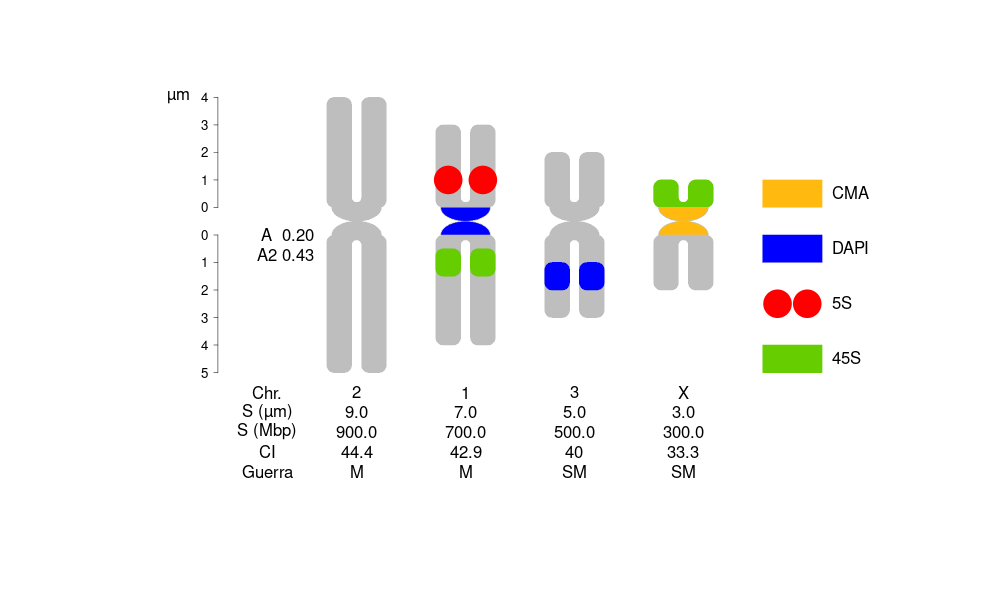

In [2]:
data(dfOfChrSize) # chromosome data
data(dfMarkColor) # mark general data
data(dfOfMarks2)  # mark position data (inc. cen.)

# column Mbp not for plotting purposes
dfOfChrSize$Mbp<-(dfOfChrSize$shortArmSize+dfOfChrSize$longArmSize)*100

# svg("dfOfChrSize.svg", width=10, height=6 )
# png("dfOfChrSize.png", width=500, height=400)
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 100)

suppressMessages(
plotIdiograms(dfChrSize  =dfOfChrSize,  # data.frame of chr. size
              dfMarkColor=dfMarkColor,  # d.f of mark style <- Optional
              dfMarkPos=dfOfMarks2,     # df of mark positions (includes cen. marks)
              
              karHeight=5,              # kar. height
              chrWidth = 1.2,           # chr. width
              chrSpacing = 1,           # space among chr.
              
              morpho="Guerra",          # chr. morpho. classif. (Guerra, Levan, both, "" ) ver. >= 1.12 only
              chrIndex="CI",            # cen. pos. (CI, AR, both, "" ) ver. >= 1.12 only
              chrSize = TRUE,           # add chr. sizes under chr.
              chrSizeMbp = TRUE,        # add Mbp sizes under chr. (see above)
              
              rulerPos= 0,              # position of ruler
              ruler.tck=-0.01,          # size and orientation of ruler ticks
              rulerNumberSize=.8        # font size of rulers
              ,xPosRulerTitle = 3             # pos of ruler title
              
              ,legendWidth=1            # width of legend items
              ,fixCenBorder = TRUE      # use chrColor as border color of cen. or cen. marks
              ,distTextChr = 1.2        # chr. text separation
              
              ,xlimLeftMod = 2          # xlim left param.
              ,ylimBotMod = 0           # modify ylim bottom argument
              ,ylimTopMod = 0           # modify ylim top argument
)
)
# dev.off() # close svg()

###  Let's explore the data.frames for monocentrics: {-}

If only one species, column OTU is optional

In [17]:
# chromosome data, if only 1 species, column OTU is optional
dfOfChrSize
# mark general data

chrName,shortArmSize,longArmSize,Mbp
<chr>,<dbl>,<dbl>,<dbl>
1,3,4,700
2,4,5,900
3,2,3,500
X,1,2,300


In [18]:
# mark general data
dfMarkColor

markName,markColor,style
<chr>,<chr>,<chr>
5S,red,dots
45S,chartreuse3,square
DAPI,blue,square
CMA,darkgoldenrod1,square


`p, q` and `w` marks can have empty columns `markDistCen` and `markSize` since v. 1.9.1 to plot whole arms (`p`, `q`) and whole chr. `w`.

In [19]:
# mark position data (inc. cen.) 
dfOfMarks2

,chrName,markName,chrRegion,markSize,markDistCen
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,5S,p,1,0.5
2,1,45S,q,1,0.5
3,X,45S,p,NA,NA
4,3,DAPI,q,1,1.0
5,1,DAPI,cen,NA,NA
6,X,CMA,cen,NA,NA


## Holocentrics

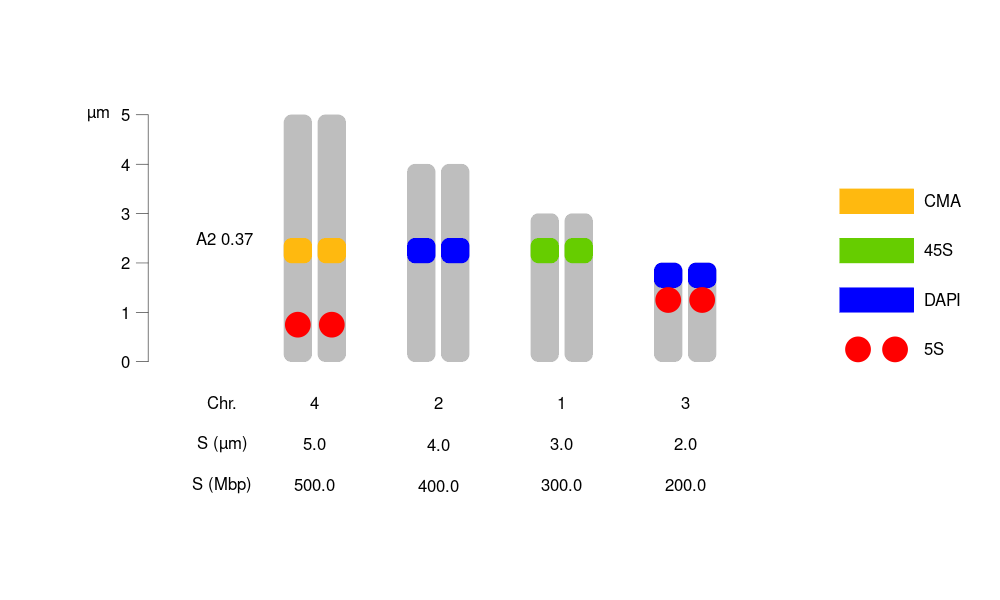

In [20]:
library(idiogramFISH)

# load some package data.frames - optional
data(dfChrSizeHolo, dfMarkColor, dfMarkPosHolo)

# column Mbp not for plotting purposes
dfChrSizeHolo$Mbp<-dfChrSizeHolo$chrSize*100

# svg("testing.svg",width=14,height=8 )
par(mar = c(0, 0, 0, 0), omi=rep(0,4) )

# png("dfOfChrSize.png", width=500, height=400)
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 100)

suppressMessages(

plotIdiograms(dfChrSize  =dfChrSizeHolo, # data.frame of chr. size
              dfMarkColor=dfMarkColor,   # df of mark style
              dfMarkPos  =dfMarkPosHolo, # df of mark positions
              
              addOTUName=FALSE,        # do not add OTU names
              distTextChr = 1,         # chr. name distance to chr.
              chrSize = TRUE,          # show chr. size under chr.
              chrSizeMbp = TRUE,       # show chr. size in Mbp under chr. requires Mbp column
              
              rulerPos=-0.1,           # position of ruler
              rulerNumberPos=.9        # position of numbers of rulers
              ,xPosRulerTitle = 3            # pos. of ruler title (units)
              
              ,xlimLeftMod=2           # modify xlim left argument of plot
              ,ylimBotMod=.2           # modify ylim bottom argument of plot
              ,legendHeight=.5         # height of legend labels
              ,legendWidth = 1.2       # width of legend labels
              ,xModifier = 20        # separ. among chromatids
              )
    )
    #dev.off() # close svg()

### Let's explore the data.frames for holocentrics:

* chromosome data, if only 1 species, column OTU is optional

In [21]:
dfChrSizeHolo

chrName,chrSize,Mbp
<dbl>,<dbl>,<dbl>
1,3,300
2,4,400
3,2,200
4,5,500


In [4]:
# mark general data

dfMarkColor

markName,markColor,style
<chr>,<chr>,<chr>
5S,red,dots
45S,chartreuse3,square
DAPI,blue,square
CMA,darkgoldenrod1,square


In [24]:
# mark position data, if only 1 species, column OTU is optional (mandatory if in d.f of Chr. Size)

dfMarkPosHolo

chrName,markName,markPos,markSize
<dbl>,<chr>,<dbl>,<dbl>
3,5S,1.0,0.5
3,DAPI,1.5,0.5
1,45S,2.0,0.5
2,DAPI,2.0,0.5
4,CMA,2.0,0.5
4,5S,0.5,0.5


## Plotting both mono. and holo.

Merge data.frames with `plyr` [@plyr2011]

In [25]:
# chromosome data, if only 1 species, column OTU is optional
require(plyr)
dfOfChrSize$OTU   <- "Species mono"
dfChrSizeHolo$OTU <- "Species holo"
 
monoholoCS <- plyr::rbind.fill(dfOfChrSize,dfChrSizeHolo)

dfOfMarks2$OTU     <-"Species mono"
dfOfMarks2[which(dfOfMarks2$markName=="5S"),]$markSize<-.7
dfMarkPosHolo$OTU <-"Species holo"

monoholoMarks <- plyr::rbind.fill(dfOfMarks2,dfMarkPosHolo)

Loading required package: plyr



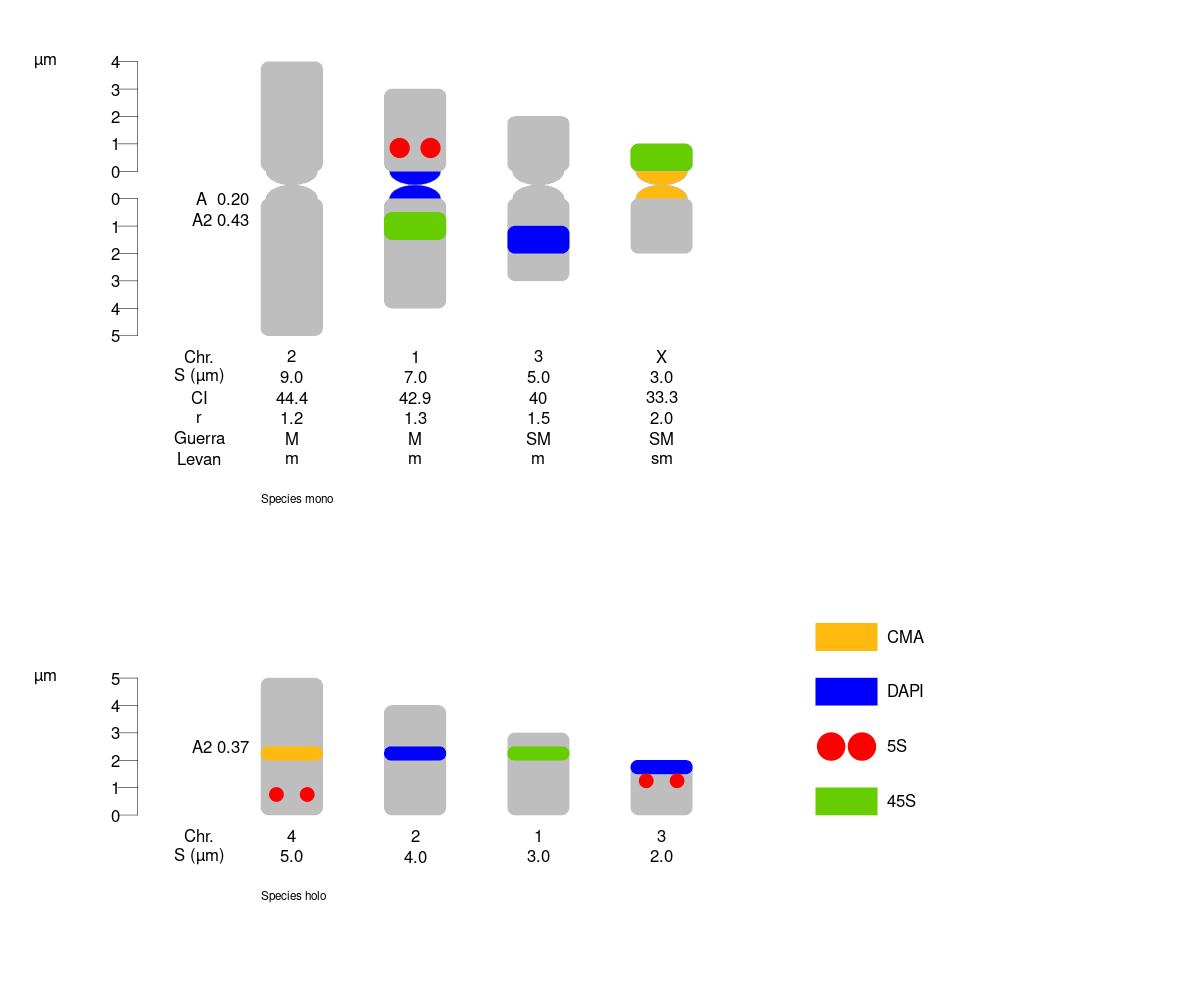

In [30]:
library(idiogramFISH)

#svg("testing.svg",width=14,height=10 )
#png("monoholoCS.png", width=700, height=600)
options(repr.plot.width = 12, repr.plot.height = 10, repr.plot.res = 100)

par(mar=rep(0,4))

suppressMessages(

plotIdiograms(dfChrSize  = monoholoCS,   # data.frame of chr. size
              dfMarkColor= dfMarkColor,  # df of mark style
              dfMarkPos  = monoholoMarks,# df of mark positions, includes cen. marks
              
              chrSize = TRUE,            # show chr. size under chr.
              
              squareness = 4,            # vertices squareness
              roundedCen = FALSE,        # triangular cen.
              addOTUName = TRUE,         # add OTU names
              OTUTextSize = .7,          # font size of OTU
              distTextChr = .5,          # separ. among chr. and text and among chr. name and indices
              
              karHeiSpace = 4,           # karyotype height inc. spacing
              karIndexPos = .2,          # move karyotype index
              
              legendHeight= 1,           # height of legend labels
              legendWidth = 1,           # width of legend labels
              fixCenBorder = TRUE,       # use chrColor as border color of cen. or cen. marks
              
              rulerPos= 0,               # position of ruler
              ruler.tck=-0.02,           # size and orientation of ruler ticks
              rulerNumberPos=.9,         # position of numbers of rulers
              xPosRulerTitle = 3.5,      # ruler title (units) position
              
              xlimLeftMod=1,             # modify xlim left argument of plot
              xlimRightMod=3,            # modify xlim right argument of plot
              ylimBotMod= .2             # modify ylim bottom argument of plot
              
              ,chromatids=FALSE          # do not show separ. chromatids
              
              # ,useOneDot=TRUE
              
              # ,circularPlot = TRUE       # circularPlot
              # ,shrinkFactor = .9         # percentage 1 = 100% of circle with chr.
              # ,circleCenter = 3          # X coordinate of circleCenter (affects legend pos.)
              # ,chrLabelSpacing = .9      # chr. names spacing
              
              # ,OTUsrt = 0                # angle for OTU name (or number)
              # ,OTUplacing = "number"     # Use number and legend instead of name
              # ,OTULabelSpacerx = -0.6    # modify position of OTU label, when OTUplacing="number" or "simple"
              # ,OTUlegendHeight = 1.5     # space among OTU names when in legend - OTUplacing
              # ,separFactor = 0.75        # alter separ. of kar.
)
)
#dev.off() # close png